In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import load_datasets
from utils.model_utils import initialize_model
from utils.train_utils import train_model
from utils.metrics import evaluate_model
from utils.visualization import plot_training, plot_confusion_matrix

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 32
num_epochs = 10
learning_rate = 0.001
num_classes = 2

In [5]:
print("[INFO] Loading datasets...")
train_loader, val_loader, test_loader = load_datasets(data_dir, batch_size, augmentation="baseline")
print("[INFO] Datasets loaded successfully!")



[INFO] Loading datasets...
[INFO] Datasets loaded successfully!


In [6]:
print("\n[INFO] Starting Baseline Training for Model: resnet18\n")
print("[INFO] Initializing ResNet18 model...")
model = initialize_model(
    model_name="mobilenet_v2",
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Baseline Training for Model: resnet18

[INFO] Initializing ResNet18 model...
[INFO] Model initialized successfully!


C:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
print("[INFO] Starting model training...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=None,  # No learning rate scheduler for baseline
    # num_epochs=num_epochs,
    device=device,
    save_path="outputs/models/baseline/mobilenetv2.pt",
    early_stop_patience=10,     # Stop after 5 epochs without improvement
    monitor_metric="val_recall",
)
print("[INFO] Training completed successfully!")

[INFO] Starting model training...

Starting training...



Epoch [1]:
    Train Loss: 0.4777, Train Acc: 0.7758
    Val Loss:   0.4206, Val Acc:   0.8060
    Val Recall: 0.9431, Val F1:   0.8561
    Learning Rate: 0.001000

[INFO] Best model saved with val_recall: 0.9431


Epoch [2]:
    Train Loss: 0.3674, Train Acc: 0.8362
    Val Loss:   0.3841, Val Acc:   0.8259
    Val Recall: 0.9228, Val F1:   0.8664
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 1/10


Epoch [3]:
    Train Loss: 0.3300, Train Acc: 0.8590
    Val Loss:   0.3764, Val Acc:   0.8308
    Val Recall: 0.8415, Val F1:   0.8589
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 2/10


Epoch [4]:
    Train Loss: 0.3078, Train Acc: 0.8749
    Val Loss:   0.3948, Val Acc:   0.8284
    Val Recall: 0.9472, Val F1:   0.8710
    Learning Rate: 0.001000

[INFO] Best model saved with val_recall: 0.9472


Epoch [5]:
    Train Loss: 0.3055, Train Acc: 0.8718
    Val Loss:   0.3660, Val Acc:   0.8408
    Val Recall: 0.9390, Val F1:   0.8783
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 1/10


Epoch [6]:
    Train Loss: 0.2958, Train Acc: 0.8813
    Val Loss:   0.4315, Val Acc:   0.8234
    Val Recall: 0.9593, Val F1:   0.8692
    Learning Rate: 0.001000

[INFO] Best model saved with val_recall: 0.9593


Epoch [7]:
    Train Loss: 0.3036, Train Acc: 0.8691
    Val Loss:   0.3554, Val Acc:   0.8383
    Val Recall: 0.9187, Val F1:   0.8743
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 1/10


Epoch [8]:
    Train Loss: 0.2886, Train Acc: 0.8829
    Val Loss:   0.3436, Val Acc:   0.8483
    Val Recall: 0.8984, Val F1:   0.8787
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 2/10


Epoch [9]:
    Train Loss: 0.2709, Train Acc: 0.8898
    Val Loss:   0.3478, Val Acc:   0.8532
    Val Recall: 0.9268, Val F1:   0.8854
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 3/10


Epoch [10]:
    Train Loss: 0.2710, Train Acc: 0.8914
    Val Loss:   0.3412, Val Acc:   0.8632
    Val Recall: 0.9146, Val F1:   0.8911
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 4/10


Epoch [11]:
    Train Loss: 0.2758, Train Acc: 0.8792
    Val Loss:   0.3521, Val Acc:   0.8507
    Val Recall: 0.9228, Val F1:   0.8833
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 5/10


Epoch [12]:
    Train Loss: 0.2643, Train Acc: 0.8898
    Val Loss:   0.3422, Val Acc:   0.8532
    Val Recall: 0.9146, Val F1:   0.8841
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 6/10


Epoch [13]:
    Train Loss: 0.2671, Train Acc: 0.8834
    Val Loss:   0.4770, Val Acc:   0.8308
    Val Recall: 0.9715, Val F1:   0.8755
    Learning Rate: 0.001000

[INFO] Best model saved with val_recall: 0.9715


Epoch [14]:
    Train Loss: 0.2822, Train Acc: 0.8871
    Val Loss:   0.3475, Val Acc:   0.8607
    Val Recall: 0.9228, Val F1:   0.8902
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 1/10


Epoch [15]:
    Train Loss: 0.2599, Train Acc: 0.8930
    Val Loss:   0.3467, Val Acc:   0.8532
    Val Recall: 0.9065, Val F1:   0.8832
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 2/10


Epoch [16]:
    Train Loss: 0.2549, Train Acc: 0.8956
    Val Loss:   0.3744, Val Acc:   0.8483
    Val Recall: 0.9472, Val F1:   0.8843
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 3/10


Epoch [17]:
    Train Loss: 0.2562, Train Acc: 0.8972
    Val Loss:   0.3457, Val Acc:   0.8582
    Val Recall: 0.9146, Val F1:   0.8876
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 4/10


Epoch [18]:
    Train Loss: 0.2774, Train Acc: 0.8834
    Val Loss:   0.3521, Val Acc:   0.8532
    Val Recall: 0.9309, Val F1:   0.8859
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 5/10


Epoch [19]:
    Train Loss: 0.2689, Train Acc: 0.8861
    Val Loss:   0.3471, Val Acc:   0.8532
    Val Recall: 0.8699, Val F1:   0.8789
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 6/10


Epoch [20]:
    Train Loss: 0.2594, Train Acc: 0.8813
    Val Loss:   0.3667, Val Acc:   0.8483
    Val Recall: 0.9350, Val F1:   0.8829
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 7/10


Epoch [21]:
    Train Loss: 0.2452, Train Acc: 0.9067
    Val Loss:   0.3874, Val Acc:   0.8458
    Val Recall: 0.9472, Val F1:   0.8826
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 8/10


Epoch [22]:
    Train Loss: 0.2638, Train Acc: 0.8839
    Val Loss:   0.3494, Val Acc:   0.8632
    Val Recall: 0.9268, Val F1:   0.8924
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 9/10


Epoch [23]:
    Train Loss: 0.2595, Train Acc: 0.8945
    Val Loss:   0.3512, Val Acc:   0.8607
    Val Recall: 0.9146, Val F1:   0.8893
    Learning Rate: 0.001000

[INFO] No improvement in val_recall. Patience: 10/10
[INFO] Training stopped after 23 epochs.

[INFO] Training completed successfully!


In [9]:
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device
)
print(f"\n[INFO] Metrics for ResNet18:\n{metrics}")

[INFO] Evaluating the model...

[INFO] Metrics for ResNet18:
{'classification_report': {'No Fire': {'precision': 0.8831168831168831, 'recall': 0.8553459119496856, 'f1-score': 0.8690095846645367, 'support': 159.0}, 'Fire': {'precision': 0.91015625, 'recall': 0.9282868525896414, 'f1-score': 0.9191321499013807, 'support': 251.0}, 'accuracy': 0.9, 'macro avg': {'precision': 0.8966365665584415, 'recall': 0.8918163822696634, 'f1-score': 0.8940708672829587, 'support': 410.0}, 'weighted avg': {'precision': 0.8996702516233767, 'recall': 0.9, 'f1-score': 0.8996943746022145, 'support': 410.0}}, 'confusion_matrix': array([[136,  23],
       [ 18, 233]]), 'roc_auc': np.float64(0.8918163822696635)}


[INFO] Saving training and evaluation results...


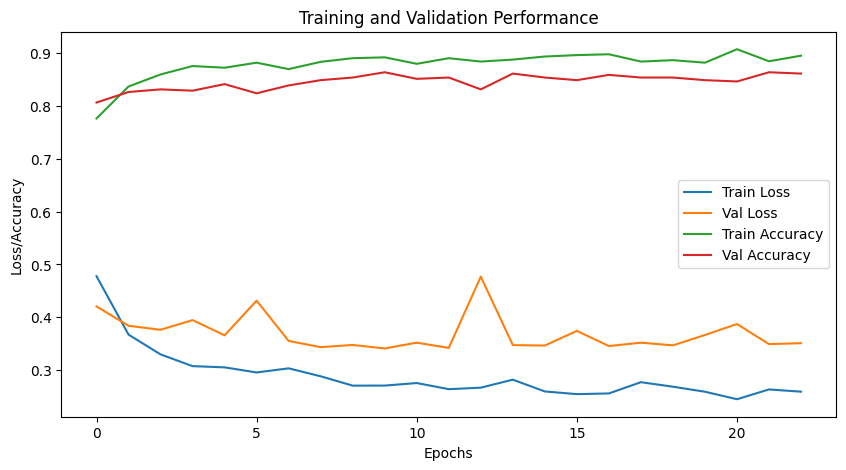

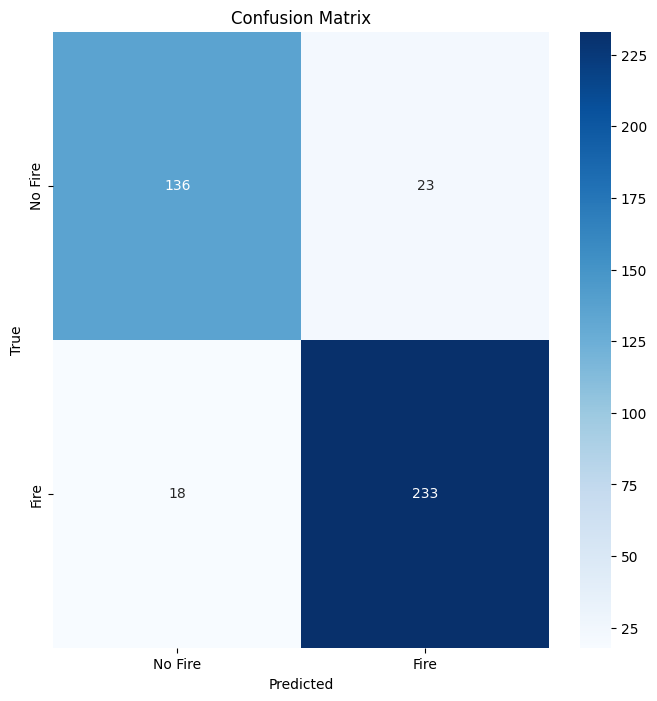

[INFO] Results saved successfully!


In [10]:
print("[INFO] Saving training and evaluation results...")
plot_training(history, "outputs/resnet18_baseline_training_curve.png")
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path="outputs/resnet18_baseline_confusion_matrix.png"
)
print("[INFO] Results saved successfully!")